## Ridge Regression from scratch for 2 Dimension

In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

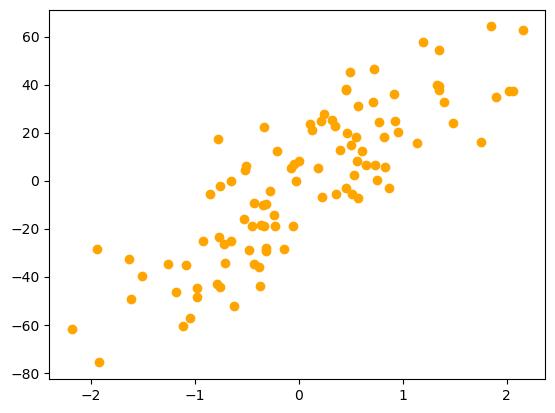

In [3]:
plt.scatter(X,y, color='orange')
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [6]:
from sklearn.linear_model import Ridge

In [7]:
rr = Ridge(alpha=10)
rr.fit(X,y)
print(rr.coef_)
print(rr.intercept_)

[24.9546267]
-2.1269130035235726


In [8]:
rr1 = Ridge(alpha=100)
rr1.fit(X,y)
print(rr1.coef_)
print(rr1.intercept_)

[12.93442104]
-1.4248441496033308


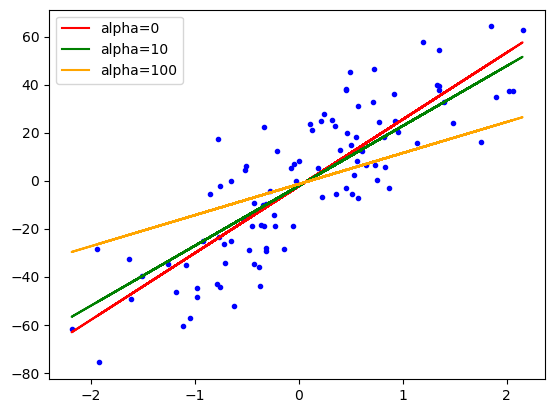

In [9]:
plt.plot(X,y,'b.')
plt.plot(X,lr.predict(X),color='red',label='alpha=0')
plt.plot(X,rr.predict(X),color='green',label='alpha=10')
plt.plot(X,rr1.predict(X),color='orange',label='alpha=100')
plt.legend()
plt.show()

In [10]:
def linear_regression(X,y,alpha=1):
    x_mean = X.mean()
    y_mean = y.mean()
    
    num = 0
    den = 0
    
    for i in range(X.shape[0]):
        num = num + (y[i] - y_mean) * (X[i] - x_mean)
        den = den + (X[i] - x_mean) * (X[i] - x_mean)
        
    m = num/(den + alpha)
    b = y_mean - m*x_mean
        
    return m,b

In [11]:
class MeraRidge:
    
    def __init__(self,alpha=0.1): # constructor
        self.alpha = alpha
        self.m = None
        self.b = None
        
    def fit(self,X_train,y_train):
        
        num = 0
        den = 0
        
        for i in range(X_train.shape[0]):
            num = num + (y_train[i] - y_train.mean())*(X_train[i] - X_train.mean())
            den = den + (X_train[i] - X_train.mean())**2
        
        self.m = num/(den + self.alpha)
        self.b = y_train.mean() - (self.m*X_train.mean())
        print(self.m,self.b)
    
    def predict(X_test):
        pass


In [12]:
reg = MeraRidge(alpha=100)

In [13]:
reg.fit(X,y)

[12.93442104] [-1.42484415]


## Ridge Regression from scratch for n Dimensions

In [15]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
import numpy as np

In [16]:
X,y = load_diabetes(return_X_y=True)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [19]:
from sklearn.linear_model import Ridge

In [20]:
reg = Ridge(alpha=0.1,solver='cholesky')

In [21]:
reg.fit(X_train,y_train)

Ridge(alpha=0.1, solver='cholesky')

In [22]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4693066828920974

In [23]:
print(reg.coef_)
print(reg.intercept_)

[  44.02025512 -241.69666596  452.98163524  332.04993719  -76.34010147
  -68.52063199 -164.98817213  149.9687712   431.61985919   58.51762582]
150.89050209333024


In [24]:
class MeraRidge:
    
    def __init__(self,alpha=0.1):
        
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self,X_train,y_train):
        
        X_train = np.insert(X_train,0,1,axis=1)
        I = np.identity(X_train.shape[1])
        I[0][0] = 0
        result = np.linalg.inv(np.dot(X_train.T,X_train) + self.alpha * I).dot(X_train.T).dot(y_train)
        self.intercept_ = result[0]
        self.coef_ = result[1:]
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [25]:
reg = MeraRidge()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

0.46930668289209776
[  44.02025512 -241.69666596  452.98163524  332.04993719  -76.34010147
  -68.52063199 -164.98817213  149.9687712   431.61985919   58.51762582]
150.8905020933302
